## <center>4. Feladatsor</center>

<img src="toohappy.gif" width="700">

<br>
<b>1.feladat.</b>  A spline beépített függvény segítségével az $x=0,\ 1,\ 2.5,\ 3.6,\ 5,\ 7,\ 8.1,\ 10$ osztópontokon készítsük el a $\sin(x)$ függvény spline interpoláltját! Ábrázoljuk egy ábrán a két függvényt és lássuk el őket címkével!

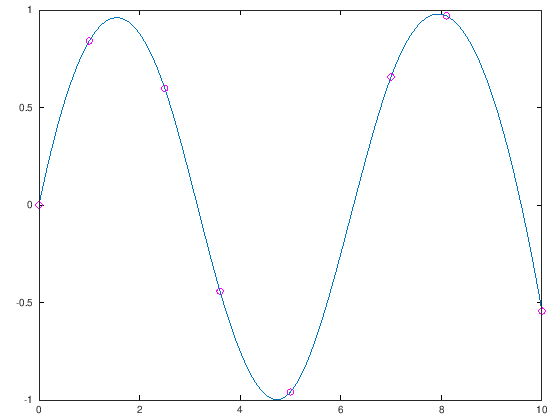

In [3]:
x = [0, 1, 2.5, 3.6, 5, 7, 8.1, 10];
y = sin(x);

xx = x(1):0.01:x(end);
P = spline(x,y); % Kobos spline interpolalo polinomot (kulonbozo peremfeltetelek vannak)
PP = spline(x,y,xx); % Finomabb spline mar kiertekelve

plot(x,y,'mo',xx,PP)

In [1]:
help spline

'spline' is a function from the file /usr/local/share/octave/5.2.0/m/polynomial/spline.m

 -- PP = spline (X, Y)
 -- YI = spline (X, Y, XI)
     Return the cubic spline interpolant of points X and Y.

     When called with two arguments, return the piecewise polynomial PP
     that may be used with 'ppval' to evaluate the polynomial at
     specific points.

     When called with a third input argument, 'spline' evaluates the
     spline at the points XI.  The third calling form 'spline (X, Y,
     XI)' is equivalent to 'ppval (spline (X, Y), XI)'.

     The variable X must be a vector of length N.

     Y can be either a vector or array.  If Y is a vector it must have a
     length of either N or 'N + 2'.  If the length of Y is N, then the
     "not-a-knot" end condition is used.  If the length of Y is 'N + 2',
     then the first and last values of the vector Y are the values of
     the first derivative of the cubic spline at the endpoints.

     If Y is an array, then the size of Y

<br>
<b>2.feladat.</b> Adjuk meg a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ egyenest és parabolát a Gauss-féle normál-egyenlet segítségével!


  <tr>
<td>t_i | -2 | -1 | 1 | 2 </td>
  </tr>
  <br>
  <tr>
    <td>f_i | 3 | 1 | 0 | 2   </td>
  </tr>




Számítsuk ki a maradékvektor euklideszi hosszának négyzetét!<br>

x =

   1.50000
  -0.30000

M =

    4    0
    0   10

ans =

    4    0
    0   10

f_hullam =

   6
  -3

ans =

   6
  -3

J =  4.1000


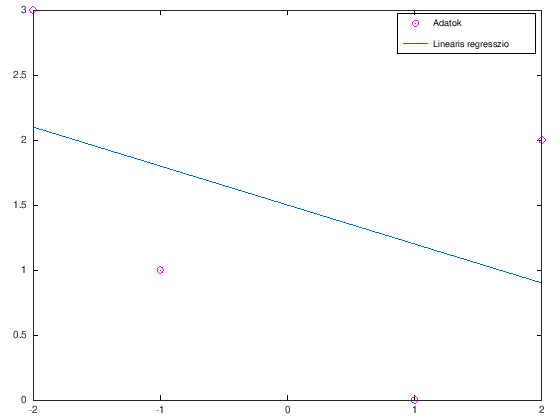

In [2]:
% Amit a gyakorlati feladatsoron lathattatok, az a Gauss-fele normalegyenlet polinom esete n=1-re 2-es normaban

%% Egyenes (linearis regresszio)
t = [-2 -1 1 2];
f = [3 1 0 2];


M = [length(t) sum(t); sum(t) sum(t.^2)];
% x = a + b*t
f_hullam = [sum(f) t*f']';

x = M\f_hullam %% F(t) = 1.5 -0.3*t

tt = t(1):0.01:t(end);

plot(t,f,'mo',tt,1.5-0.3*tt)
legend('Adatok','Linearis regresszio')


A = [ones(length(t),1) t'];

%% A Gauss fele normalegyenlet: A'Ax=A'f egyenlet megoldasa
M
A'*A

f_hullam
A'*f'


%% Maradekvektor euklideszi hosszanak negyzete lin.reg eseten: ||Ax-f||_2^2

J = norm(A*x-f',2)^2


A =

   1  -2   4
   1  -1   1
   1   1   1
   1   2   4

x =

  -0.16667
  -0.30000
   0.66667

J =  0.10000


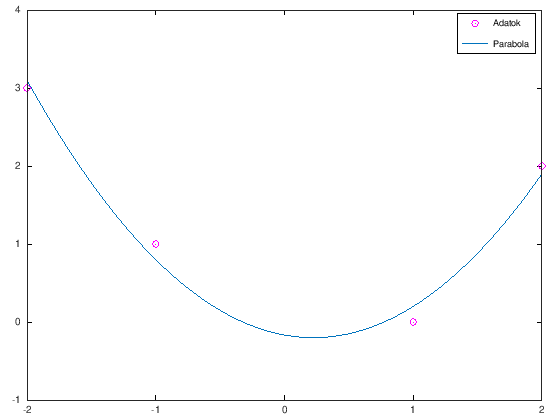

In [3]:
% Amit a gyakorlati feladatsoron lathattatok, az a Gauss-fele normalegyenlet polinom esete n=1-re 2-es normaban

%% Parabola
t = [-2 -1 1 2];
f = [3 1 0 2];




A = [ones(length(t),1) t' t.^2' ]

%% A Gauss fele normalegyenlet: A'Ax=A'f egyenlet megoldasa

x = (A'*A)\A'*f'


tt = t(1):0.01:t(end);

plot(t,f,'mo',tt,x(1)+x(2)*tt+x(3)*tt.^2)
legend('Adatok','Parabola')

%% Maradekvektor euklideszi hosszanak negyzete parabola eseten: ||Ax-f||_2^2

J = norm(A*x-f',2)^2


<br>
<b>3.feladat.</b> Oldjuk meg az előző feladatot beépített függvények segítségével!

ans =

   1.50000  -0.30000



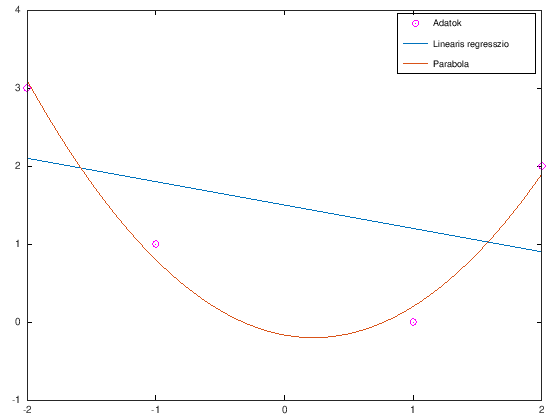

In [17]:
%% Adatok
t = [-2 -1 1 2];
f = [3 1 0 2];
tt = t(1):0.01:t(end);


P_linreg = polyfit(t, f, 1); 
flip(P_linreg) %% Ez bizonyos verzioszamtol kezdve MATLAB-ban szukseges a polyfit parancs jo hasznalatahoz
               %% https://www.mathworks.com/help/matlab/ref/polyfit.html

linreg = polyval(P_linreg,tt);

%% F(t) = x_1 + x_2*t

%x_linreg =
%   1.50000
%  -0.30000

P_parabola = polyfit(t, f, 2);
parabola = polyval(P_parabola,tt);
%x_parabola =

%  -0.16667
%  -0.30000
%   0.66667

plot(t,f,'mo',tt,linreg,tt,parabola)
legend('Adatok','Linearis regresszio','Parabola')

<br>
<b>4.feladat.</b> Írjuk legkisebbnegyzetek néven olyan programot, amely megadja a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ $n$-edfokú polinomot a Gauss-féle normál-egyenlet segítségével és kiszámíja a maradékvektor euklideszi hosszának négyzetét!

In [2]:
clear all
%% F(t) = x_1 + x_2*t + ... + x_{n+1}*t^n 
t = [-2 -1 1 2];
f = [3 1 0 2];
n = 2;

% function [x, J] = legkisebbnegyzetek(t,f,n)

A(:,1)=ones(length(t),1);
for j=2:n+1
    A(:,j)=A(:,j-1).*t';
end

x = (A'*A)\(A'*f')
J = norm(A*x-f',2)^2

x =

  -0.16667
  -0.30000
   0.66667

J =  0.10000


In [1]:
[x,J]=legkisebbnegyzetek([-2 -1 1 2],[3 1 0 2],2)

x =

  -0.16667
  -0.30000
   0.66667

J =  0.10000


<br>
<b>5.feladat.</b> Írjunk olyan programot, mely az alábbi 

+ $\displaystyle \frac{f(x_0+h)-f(x_0)}{h}$<br>
+ $\displaystyle \frac{f(x_0+h)-f(x_0-h)}{2h}$<br>
+ $\displaystyle \frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}$<br>

véges differenciahányadokosat kiszámolja adott függvényre, adott pontban és adott lépésközzel. Eredményeinket vessük össze a megfelelő derivált értékekkel!

In [4]:
[elso, elsoketto, masodik] = derivalt(@(x)(sin(x)),0.4,0.1)


elso =  0.90007
elsoketto =  0.91953
masodik = -0.38909
ans =  0.92106
ans = -0.38942
